### Importación de datos



In [9]:
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\edtom\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 0. Exploración de datos

El conjunto de datos incluye la siguiente información:

* **Producto y Categoría:** Artículos vendidos y sus calificaciones.
* **Precio y Envío:** Valores de venta y costos asociados.
* **Fecha y ubicación de compra:** Información temporal y geográfica.
* **Evaluación de compra:** Comentarios de clientes.
* **Tipo de Pago y Cuotas:** Métodos utilizados por los clientes.
* **Coordenadas Geográficas:** Ubicación de las transacciones.

Podemos observar que todos los archivos incluyen las mismas columnas en el siguiente código, también resalta que todos a exepción de la tienda 4 tienen el mismo número de filas. 

In [14]:
# creamos una lista con las tiendas 
tiendas = [tienda, tienda2, tienda3, tienda4] 

# obtenemos el nombre de las columnas de la primer tienda para usarla como referencia
columnas_referencia = set(tiendas[0].columns)

# verificamos si las demás tiendas tienen la misma columan
for i, df in enumerate(tiendas[1:], start=2):
    columnas_actual = set(df.columns)
    if columnas_actual == columnas_referencia:
        print(f'Tienda {i}: columnas iguales a la tienda 1 ✅')
    else:
        print(f'Tienda {i}: columnas diferentes a la tienda 1 ❌')
        print(f"Diferencias: {columnas_referencia.symmetric_difference(columnas_actual)}") #muestrá que columnas son diferentes
        


Tienda 2: columnas iguales a la tienda 1 ✅
Tienda 3: columnas iguales a la tienda 1 ✅
Tienda 4: columnas iguales a la tienda 1 ✅


In [ ]:
#recuento de filas y columnas
for i, df in enumerate(tiendas, start=1):
    filas, columnas = df.shape
    print(f"Tienda {i}: {filas} filas, {columnas} columnas")

Tienda 1: 2359 filas, 12 columnas
Tienda 2: 2359 filas, 12 columnas
Tienda 3: 2359 filas, 12 columnas
Tienda 4: 2358 filas, 12 columnas


Analistando el tipo de datos de cada columna observamos que la columna "Fecha de Compra" tiene un tipo de dato "object" por lo que se cambiará para su manipulación a un tipo "datetime"

In [24]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [32]:
tienda["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda2["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda3["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda4["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")

tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2358 non-null   object        
 1   Categoría del Producto  2358 non-null   object        
 2   Precio                  2358 non-null   float64       
 3   Costo de envío          2358 non-null   float64       
 4   Fecha de Compra         2358 non-null   datetime64[ns]
 5   Vendedor                2358 non-null   object        
 6   Lugar de Compra         2358 non-null   object        
 7   Calificación            2358 non-null   int64         
 8   Método de pago          2358 non-null   object        
 9   Cantidad de cuotas      2358 non-null   int64         
 10  lat                     2358 non-null   float64       
 11  lon                     2358 non-null   float64       
 12  fecha                   2358 non-null   datetime

# 1. Análisis de facturación



In [ ]:
#Calcular el ingreso total para cada tienda
for i, df in enumerate(tiendas, start=1):
    suma_precio = df["Precio"].sum()
    print(f'Tinda {i}: suma total de "Precio" =${suma_precio:,.2f}')


Tinda 1: suma total de "Precio" =$1,150,880,400.00
Tinda 2: suma total de "Precio" =$1,116,343,500.00
Tinda 3: suma total de "Precio" =$1,098,019,600.00
Tinda 4: suma total de "Precio" =$1,038,375,700.00


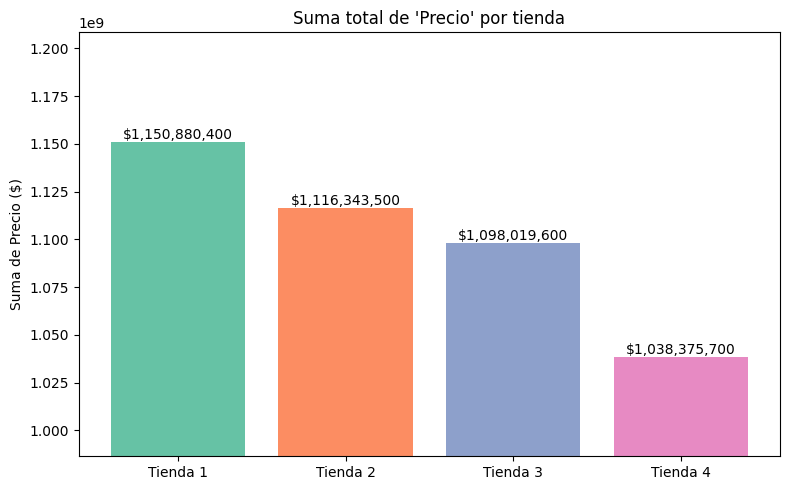

In [ ]:
# Lista de tiendas y nombres
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
sumas = []

# Calcular la suma del precio por tienda
for df in tiendas:
    suma_precio = df["Precio"].sum()
    sumas.append(suma_precio)

#Creación del gráfico de barras
plt.figure(figsize=(8,5))
bar_colors=plt.get_cmap('Set2').colors  # Lista de colores
plt.bar(nombres_tiendas, sumas, color=bar_colors[:len(nombres_tiendas)])
plt.title("Suma total de 'Precio' por tienda")
plt.ylabel("Suma de Precio ($)")
plt.xticks(rotation=0)

# añadimos un límite inferior en el eje y para visualisar mejor la diferencia 
minimo = min(sumas)
ajuste = minimo * 0.95  # empieza un 5% más abajo
plt.ylim(ajuste)


# Añadir etiquetas en las barras
for i, valor in enumerate(sumas):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

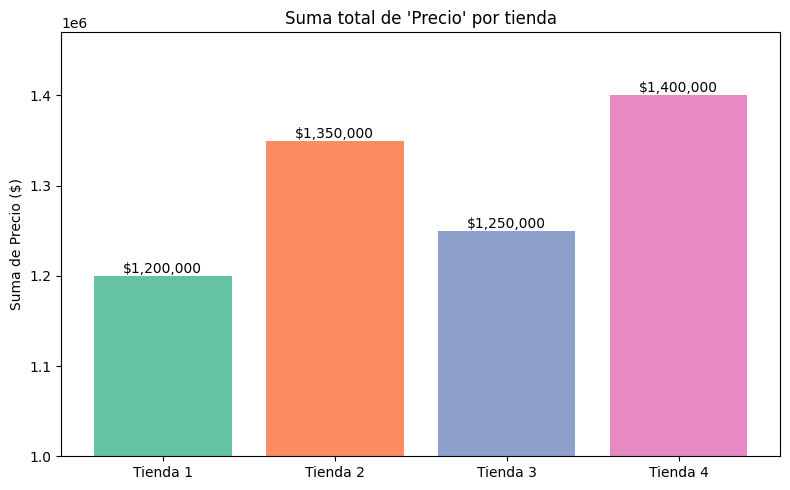

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda